### Convolutional Neural Networks
Example of identification of handwritten digits from: 'https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/'

In [1]:
# import datasets
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot
import numpy as np

In [2]:
#Load dataset
(trainX, trainy),(testX,testy) = mnist.load_data()


In [3]:
#Summarize loaded dataset
print('Train sets: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test sets: X=%s, y=%s' % (testX.shape, testy.shape))

Train sets: X=(60000, 28, 28), y=(60000,)
Test sets: X=(10000, 28, 28), y=(10000,)


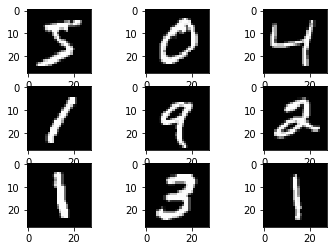

In [4]:
#plot a few images:
for i in range(9):
    #define subplot:
    pyplot.subplot(330+1+i)
    #plot raw pixel data
    pyplot.imshow(trainX[i],cmap=pyplot.get_cmap('gray'))
#show figure
pyplot.show()

In [5]:
#Normalize image features
trainX,testX=trainX/255.0, testX/255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [7]:
model.fit(trainX, trainy, epochs=5)
model.evaluate(testX, testy, verbose=2)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2909 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1418 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1054 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0859 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0754 - accuracy: 0.9765
313/313 - 0s - loss: 0.0754 - accuracy: 0.9764


[0.07536138594150543, 0.9764000177383423]

### Prediction and checking
With this part of the notebook, one can chech a single image. By selecting a number in ```image```, we are choosing a file from the testing dataset. It is later entered in the model to obtain its prediction. Theprediction is displayed as the label of the image. The image itself is the one the model has processed.

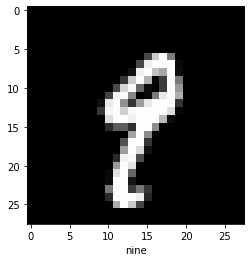

In [12]:
image = 78
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']
prediction=model.predict(testX)
ind = np.argmax(prediction[image])
pyplot.imshow(testX[image],cmap=pyplot.get_cmap('gray'))
pyplot.xlabel(class_names[ind])
pyplot.show()